In [1]:
# review NLP

In [2]:
# words, sentence, text ---> numbers
# doc, article, blog post, tweet, fb --> vector
# the columns / features are the vocabulary
# bag of words - each component of vector is count (countvectorizer)
# tfidf - term freq, inv doc freq -- similar to BoW, expect it boost rare words and 
# penialize common words - (tfidfvectorizer)

In [3]:
# 3 things
# A. supervised learning (tweets that are already rated good or bad), you can train model, KNN, DT, LogReg
# B. unsupervised learning (articles from nytimes, no labels) - clustering assign labels to the clusters
# for example, religion, politics, sports, science, etc.
# C. hybrid approach
# predict MPG for car, weight, hp, acceleration, etc., but 1 feature written description "this car get really good
# gas milage, rarely did i need to get gas" - use it
# unsupervised learing on the feature
# text          cluster
# abcdefg       1
# sadfasd       1
# lsdfsdf       2
# idsfasd       1

In [4]:
# unsupervised NLP
# split your data 75, 25 percent split
# clustering on 75%, get labels and apply them (the labels) to the clusters
# you had 3 clusters, you could label "religion", "science", "sports"

# then, you could then "test data set" and assign to the previously created
# clusters
# test_sample_1  == 3 (religion)
# test_sample_2  == 1 (science)
# test_sample_3  == 1 (science)
# test_sample_4  == 2 (sports)

In [5]:
# imports

In [6]:
import spacy
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.cluster import KMeans

%matplotlib inline

In [7]:
nlp = spacy.load('en_core_web_lg')

In [8]:
text = """
Neuro-linguistic programming (NLP) is a psychological approach that involves analyzing strategies used by successful individuals and applying them to reach a personal goal. It relates thoughts, language, and patterns of behavior learned through experience to specific outcomes. 
Proponents of NLP assume all human action is positive. Therefore, if a plan fails or the unexpected happens, the experience is neither good nor bad—it simply presents more useful information.
"""

In [9]:
# do the NLP pipeline ... but Spacy has it's own pipeline, but can be overriden

In [10]:
doc = nlp(text)

In [13]:
list(doc.sents)

[
 Neuro-linguistic programming (NLP) is a psychological approach that involves analyzing strategies used by successful individuals and applying them to reach a personal goal.,
 It relates thoughts, language, and patterns of behavior learned through experience to specific outcomes. ,
 Proponents of NLP assume all human action is positive.,
 Therefore, if a plan fails or the unexpected happens, the experience is neither good nor bad—it simply presents more useful information.]

In [19]:
for i, s in enumerate(doc.sents):
    print(i, s, type(s))
    print('-' * 100)

0 
Neuro-linguistic programming (NLP) is a psychological approach that involves analyzing strategies used by successful individuals and applying them to reach a personal goal. <class 'spacy.tokens.span.Span'>
----------------------------------------------------------------------------------------------------
1 It relates thoughts, language, and patterns of behavior learned through experience to specific outcomes. 
 <class 'spacy.tokens.span.Span'>
----------------------------------------------------------------------------------------------------
2 Proponents of NLP assume all human action is positive. <class 'spacy.tokens.span.Span'>
----------------------------------------------------------------------------------------------------
3 Therefore, if a plan fails or the unexpected happens, the experience is neither good nor bad—it simply presents more useful information.
 <class 'spacy.tokens.span.Span'>
-----------------------------------------------------------------------------------

In [25]:
doc[0], doc[1], doc[2], doc[3], doc[4]

(, Neuro, -, linguistic, programming)

In [32]:
for i, token in enumerate(doc):
    print(i, token, token.tag_, spacy.explain(token.tag_), token.lemma_, token.is_stop)

0 
 _SP None 
 False
1 Neuro JJ adjective neuro False
2 - HYPH punctuation mark, hyphen - False
3 linguistic JJ adjective linguistic False
4 programming NN noun, singular or mass programming False
5 ( -LRB- left round bracket ( False
6 NLP NNP noun, proper singular NLP False
7 ) -RRB- right round bracket ) False
8 is VBZ verb, 3rd person singular present be True
9 a DT determiner a True
10 psychological JJ adjective psychological False
11 approach NN noun, singular or mass approach False
12 that WDT wh-determiner that True
13 involves VBZ verb, 3rd person singular present involve False
14 analyzing VBG verb, gerund or present participle analyze False
15 strategies NNS noun, plural strategy False
16 used VBN verb, past participle use True
17 by IN conjunction, subordinating or preposition by True
18 successful JJ adjective successful False
19 individuals NNS noun, plural individual False
20 and CC conjunction, coordinating and True
21 applying VBG verb, gerund or present participle appl

In [34]:
nlp('sally likes to run').to_json()

{'text': 'sally likes to run',
 'ents': [{'start': 0, 'end': 11, 'label': 'PERSON'}],
 'sents': [{'start': 0, 'end': 18}],
 'tokens': [{'id': 0,
   'start': 0,
   'end': 5,
   'pos': 'PROPN',
   'tag': 'NNP',
   'dep': 'nsubj',
   'head': 1},
  {'id': 1,
   'start': 6,
   'end': 11,
   'pos': 'VERB',
   'tag': 'VBZ',
   'dep': 'ROOT',
   'head': 1},
  {'id': 2,
   'start': 12,
   'end': 14,
   'pos': 'PART',
   'tag': 'TO',
   'dep': 'aux',
   'head': 3},
  {'id': 3,
   'start': 15,
   'end': 18,
   'pos': 'VERB',
   'tag': 'VB',
   'dep': 'xcomp',
   'head': 1}]}

In [39]:
# 300-d vector
nlp('dog').vector[:10]

array([-0.40176 ,  0.37057 ,  0.021281, -0.34125 ,  0.049538,  0.2944  ,
       -0.17376 , -0.27982 ,  0.067622,  2.1693  ], dtype=float32)

In [40]:
nlp('cat').vector[:10]

array([-0.15067 , -0.024468, -0.23368 , -0.23378 , -0.18382 ,  0.32711 ,
       -0.22084 , -0.28777 ,  0.12759 ,  1.1656  ], dtype=float32)

In [41]:
# the spacy library was trained on over 1 million english words

In [42]:
# asdfasdfa -> 0, 0, 0

In [49]:
words = ['car', 'truck', 'dragon', 'lion', 'man', 'woman',
         'girl', 'boy', 'king', 'queen', 'sun', 'moon', 'mars', 'venus',
         'denver', 'san francisco', 'seattle', 'ASDFASDFASDFASDFA'
        ]

In [50]:
vectors = [nlp(w).vector for w in words]

In [54]:
vectors[-1][:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [56]:
v_2d = PCA(n_components=2).fit_transform(vectors); v_2d[:5]

array([[-1.52124862,  4.4262784 ],
       [-1.44593425,  4.14431256],
       [-0.10977483, -2.08422866],
       [-0.14329302, -1.38582047],
       [-3.21424693,  0.22964008]])

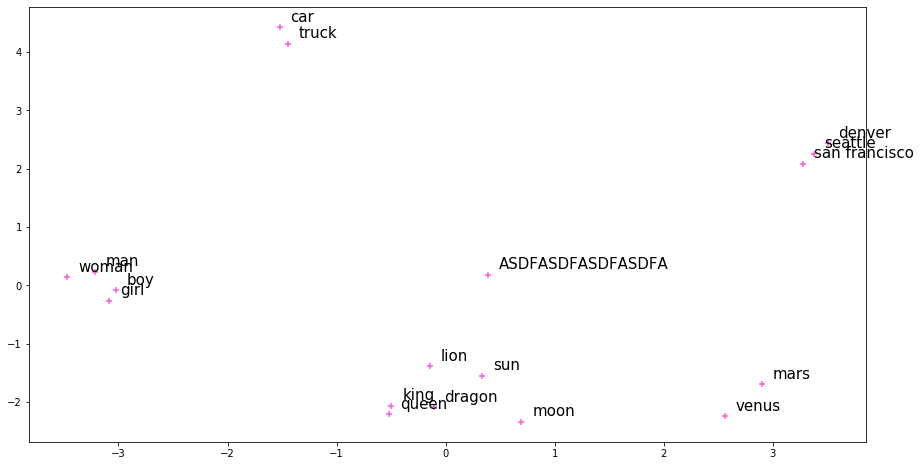

In [72]:
plt.figure(figsize=(15, 8))
plt.scatter(v_2d[:,0], v_2d[:,1], c='#ff33cc', marker='+', alpha=0.8)
for word, coord in zip(words, v_2d):
    x, y = coord
    plt.text(x + 0.1, y + 0.1, word, size=15)

In [73]:
# simple example

In [76]:
# cosine similarity
np.rad2deg(np.arccos(nlp('cat').similarity(nlp('dog'))))

36.708636515368326

In [77]:
# cosine similarity
np.rad2deg(np.arccos(nlp('cat').similarity(nlp('kitten'))))

34.759206010541185

In [78]:
# cosine similarity
np.rad2deg(np.arccos(nlp('cat').similarity(nlp('mouse'))))

64.70993975369164

In [80]:
docs = [nlp(w) for w in words]; docs[:4]

[car, truck, dragon, lion]

In [82]:
list(combinations([1,2,3],2))

[(1, 2), (1, 3), (2, 3)]

In [95]:
for a, b in combinations(docs, 2):
    print("{:<15} {:<20} {:.2f}\t{:.2f}".format(a.text, 
                                                b.text, 
                                                a.similarity(b), 
                                                np.rad2deg(np.arccos(a.similarity(b)))))

car             truck                0.71	44.66
car             dragon               0.18	79.62
car             lion                 0.18	79.91
car             man                  0.35	69.26
car             woman                0.33	70.56
car             girl                 0.33	70.80
car             boy                  0.33	70.88
car             king                 0.15	81.52
car             queen                0.12	82.95
car             sun                  0.26	74.87
car             moon                 0.19	79.04
car             mars                 0.08	85.59
car             venus                0.02	89.06
car             denver               0.27	74.46
car             san francisco        0.28	73.79
car             seattle              0.28	73.73
car             ASDFASDFASDFASDFA    0.00	90.00
truck           dragon               0.17	80.02
truck           lion                 0.21	77.95
truck           man                  0.37	68.02
truck           woman                0.3

/home/chyld/.local/miniconda3/envs/py37/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/home/chyld/.local/miniconda3/envs/py37/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/home/chyld/.local/miniconda3/envs/py37/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/home/chyld/.local/miniconda3/envs/py37/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/home/chyld/.local/miniconda3/envs/py37/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/home/chyld/.local/miniconda3/envs/py37/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/home/chyld/.local/miniconda

sun             ASDFASDFASDFASDFA    0.00	90.00
moon            mars                 0.38	67.68
moon            venus                0.55	56.71
moon            denver               0.24	75.89
moon            san francisco        0.28	73.50
moon            seattle              0.29	73.39
moon            ASDFASDFASDFASDFA    0.00	90.00
mars            venus                0.44	63.59
mars            denver               0.22	77.20
mars            san francisco        0.24	75.88
mars            seattle              0.21	77.65
mars            ASDFASDFASDFASDFA    0.00	90.00
venus           denver               0.32	71.37
venus           san francisco        0.31	71.85
venus           seattle              0.37	68.22
venus           ASDFASDFASDFASDFA    0.00	90.00
denver          san francisco        0.73	42.87
denver          seattle              0.83	33.49
denver          ASDFASDFASDFASDFA    0.00	90.00
san francisco   seattle              0.80	36.46
san francisco   ASDFASDFASDFASDFA    0.0

/home/chyld/.local/miniconda3/envs/py37/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/home/chyld/.local/miniconda3/envs/py37/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/home/chyld/.local/miniconda3/envs/py37/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/home/chyld/.local/miniconda3/envs/py37/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/home/chyld/.local/miniconda3/envs/py37/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/home/chyld/.local/miniconda3/envs/py37/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/home/chyld/.local/miniconda

In [96]:
# sentiment analysis

In [99]:
np.rad2deg(np.arccos(nlp('i love this song').similarity(nlp('the worst sucks bad terrible'))))

49.46872103743745

In [100]:
np.rad2deg(np.arccos(nlp('i love this song').similarity(nlp('i like how this sounds'))))

28.042700280342753

In [101]:
np.rad2deg(np.arccos(nlp('i like how this sounds').similarity(nlp('the worst sucks bad terrible'))))

42.1215382300021

In [102]:
nlp('i like how this sounds').vector_norm

4.333770799456536

In [104]:
np.linalg.norm(nlp('i like how this sounds').vector)

4.3337708

In [107]:
np.linalg.norm(nlp('dog').vector - nlp('cat').vector)

4.331556

In [108]:
np.linalg.norm(nlp('dog').vector - nlp('puppy').vector)

3.8324707

In [109]:
np.linalg.norm(nlp('kitten').vector - nlp('cat').vector)

3.9809752

In [117]:
for label, word in zip(KMeans(n_clusters=5).fit(vectors).labels_, words):
    print(label, '---', word)

4 --- car
4 --- truck
3 --- dragon
3 --- lion
0 --- man
0 --- woman
0 --- girl
0 --- boy
3 --- king
3 --- queen
2 --- sun
2 --- moon
2 --- mars
2 --- venus
1 --- denver
1 --- san francisco
1 --- seattle
2 --- ASDFASDFASDFASDFA


In [118]:
np.rad2deg(np.arccos(nlp('this is a leak').similarity(nlp('this is not a leak'))))

10.685276244369064

In [127]:
np.rad2deg(np.arccos(nlp('leak').similarity(nlp('not-leak'))))

43.556129157959134

In [121]:
# custom tokenizer for spacy
# n-grams, bi-grams, tri-grams, etc.

In [130]:
# cosine distance